In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
db = pd.read_csv('db_files/db_cleaned.csv')

In [4]:
db.shape

(558172, 21)

In [5]:
db.head(20)

,Unnamed: 0,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,ordering,pnconst,pcategory,region,types,nconst,primaryName,birthYear,deathYear,primaryProfession
0,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0179321,Noreen Corcoran,1943,2016,"actress,soundtrack"
1,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0228072,Françoise Diot,1914,2013,"editor,editorial_department,sound_department"
2,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0755977,Maksim Sagalovich,1915,1997,writer
3,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0790590,Haleigh Sheehan,1983,2024,actress
4,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0866390,Peter Tomarken,1942,2006,"actor,producer,writer"
5,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0179321,Noreen Corcoran,1943,2016,"actress,soundtrack"
6,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0228072,Françoise Diot,1914,2013,"editor,editorial_department,sound_department"
7,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0755977,Maksim Sagalovich,1915,1997,writer
8,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0790590,Haleigh Sheehan,1983,2024,actress
9,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0866390,Peter Tomarken,1942,2006,"actor,producer,writer"


# FAVOURITE GENRE PER DECADE

We can visualize the popularity of genres through time. We will do this by making an area chart.

In [6]:
db2 = pd.read_csv('db_files/movies_db_cleaned.csv')
db2 = db2[db2.startYear <= 2020 ]

In [7]:
# Here we count the number of occurrences of each genre per year
def count_word_occurrences(s):
    word_counts = {}
    words = s.split(',')
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

# Group the dataframe by decade and apply the function to count the word occurrences
final_counts = []
grouped_by_decade = db2.groupby((db2['startYear']))
for year, group in grouped_by_decade:
    total_word_counts = {}
    for word_counts in group['genres'].apply(lambda x: count_word_occurrences(x)):
        for word, count in word_counts.items():
            if word in total_word_counts:
                total_word_counts[word] += count
            else:
                total_word_counts[word] = count
    sorted_word_counts = dict(sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True))
    final_counts.append(sorted_word_counts)

In [8]:
# Convert the dictionaries to dataframes and stack them
dfs_by_year = [pd.DataFrame.from_dict(d, orient='index', columns=[f'{year}']) for year, d in enumerate(final_counts, start=1940)]
df_stacked = pd.concat(dfs_by_year, axis=1)
df_stacked = df_stacked.fillna(0)
df_normed = df_stacked.div(df_stacked.sum(axis=0), axis=1)

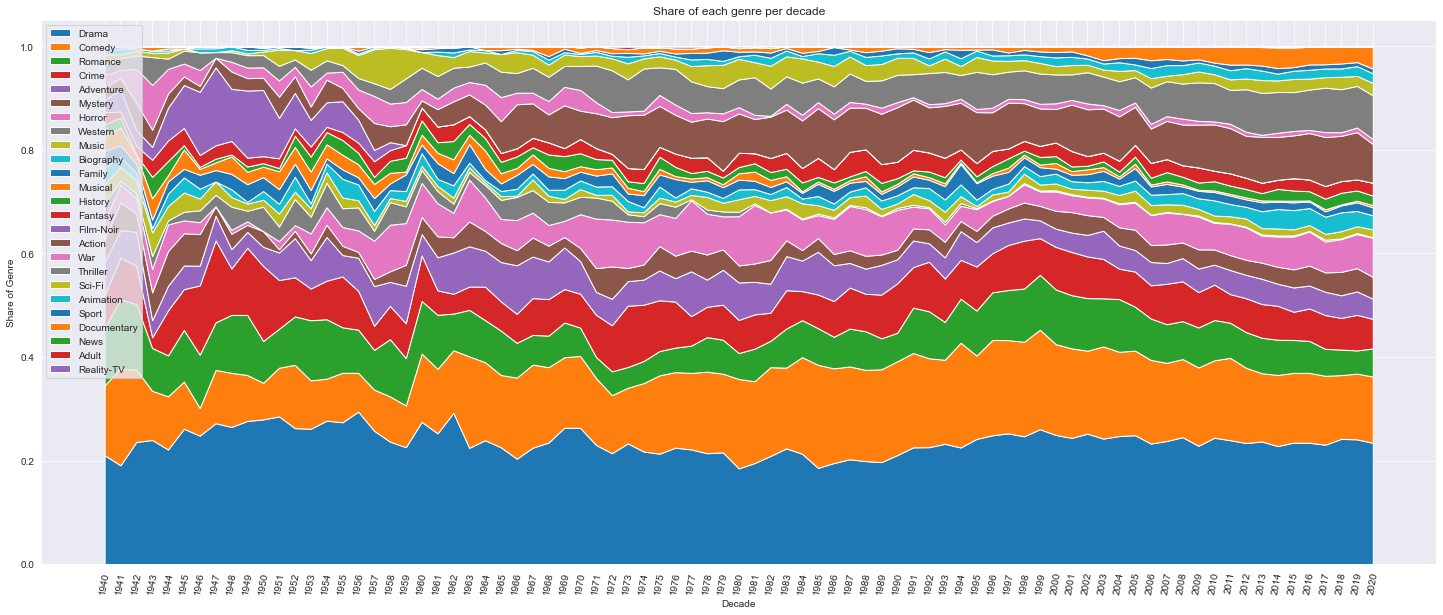

In [51]:
# Create stacked band plot
plt.figure(figsize=(25, 10))
plt.stackplot(df_normed.columns, df_normed.values, labels=df_normed.index)

# Add legend and axis labels
plt.legend(loc='upper left')
plt.xlabel('Decade')
plt.ylabel('Share of Genre')
plt.title('Share of each genre per decade')
plt.xticks(df_normed.columns,rotation = 80)
# Show the plot
plt.show()


As we can see most genres increase over time. This is because there are more films being made nowadays. Nevertheless, some genres have remained equally popular over time, like musicals. Even more, some genres were more popular in the past like Westerns.

# RATINGS THROUGH TIME

In [ ]:
sns.lineplot(data=db2,x='startYear',y='averageRating')